# Bayesian Network - Rémi Grand

*Please execute this notebook on Google Collab to download the pomegranate library*. *There were problems using Jupyter Notebook locally in my case*.
Github link : https://github.com/rgrand8/BayesianNetworks-SDD2020

Bayesian Networks are a type of graph model, which is a *directed acyclic graph*. They represent a set of variables and their conditional dependencies.

Before talking about Bayesian Networks, let's remind ourselves the classic Bayes' formula and the naive Bayes classifier for Machine Learning.


According to Bayes' theorem, we have:
$$\mathbb{P}(Y=y|X=x) =\frac{\mathbb{P}(X=x|Y=y)\cdot\mathbb{P}(Y=y)}{\mathbb{P}(X=x)}$$
$$\textrm{posterior} = \frac{\textrm{likelihood}\cdot\textrm{prior}}{\textrm{evidence}}$$


The posterior probability is often the most important probability to be predicted, since it represents the probability that sample $x$ has label $y$. This estimation is called **Bayesian inference**.



As studied in the 4th notebook (https://github.com/erachelson/MLclass/tree/master/4%20-%20Naive%20Bayes%20Classification), Naive Bayes classifier is based on a strong naive independence between the features to compute the posterior probability. To illustrate this concept, let's consider a set of variables : {$A$, $B$, $C$, $Y$}. 

The posterior probability we're willing to compute is : $\mathbb{P}(Y|A, B, C)$.

Thus, using Bayes'theorem : $$\mathbb{P}(Y|A, B, C) = \frac{\mathbb{P}(A,B,C | Y)\cdot \mathbb{P}(Y)}{\mathbb{P}(A,B,C)}$$



Moreover, \begin{align*}
\mathbb{P}(A,B,C | Y) = &\mathbb{P}(A | Y)\\
& \cdot \mathbb{P}(B | Y, A) \\
& \cdot \mathbb{P}(C | Y, A, B)
\end{align*}



Let's now apply the **naive Bayes assumption** : all the features $X$ = {$A$, $B$, $C$} are mutually independent. Then,
\begin{align*}
\mathbb{P}(A,B,C | Y) = &\mathbb{P}(A | Y)\\
& \cdot \mathbb{P}(B | Y) \\
& \cdot \mathbb{P}(C | Y) 
\end{align*} 

Finally, $$\mathbb{P}(Y|A, B, C) = \frac{\mathbb{P}(A | Y)\cdot \mathbb{P}(B | Y) \cdot \mathbb{P}(C | Y)\cdot \mathbb{P}(Y)}{\mathbb{P}(A, B, C)}$$

The **naive Bayes classifier** is then the classifier that estimates all class probabilities and returns the one with maximum probability.

Conditional dependencies between features are no longer neglected for the Bayesian Networks. Bayesian Networks are further explained in the first part [Bayesian Networks Theory](#sec1). 

In this notebook, we'll use the *pomegranate* Python library to build Bayesian Network and mainly compute posterior probabilities, imputations ... The first cell downloads this library, it should last couple minutes.



*References :*
1. Paper reference : http://publications.idiap.ch/downloads/reports/2000/rr00-03.pdf 
2. Pomegranate API : https://pomegranate.readthedocs.io/en/latest/BayesianNetwork.html
3. Python Speech Recognition Guide : https://realpython.com/python-speech-recognition/
4. Naive Bayes Classifier Notebook : https://github.com/erachelson/MLclass/tree/master/4%20-%20Naive%20Bayes%20Classification
5. Murphy K. and Mian S. (1999). *Modelling gene expression data using dynamic Bayesian networks*, Dirichlet prior method : http://members.cbio.mines-paristech.fr/~jvert/svn/bibli/local/Murphy1999Modelling.pdf
6. Algorithm 'time to convergence' comparison : https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4b_Bayesian_Network_Structure_Learning.ipynb


*Summary :*
1. [Bayesian Networks Theory](#sec1)
2. [Bayesian Networks Generation](#sec2)
    1. [Known structure and full observability - Credit Card Fraud](#sec2-1)
    2. [Unknown structure and full observability](#sec2-2)
        1. [First approach with noise generation and digit reconstitution](#sec2-3-1)
        2. [Algorithms' comparison on Bayesian Generation and pixels imputation](#sec2-3-2)
3. [Dynamic Bayesian Network (DBN)](#sec3)
    1. [DBN's theory](#sec3-1)
    2. [SpeechRecognition using DBN](#sec3-2)

In [ ]:
!pip install pomegranate

Defaulting to user installation because normal site-packages is not writeable
  Using cached pomegranate-0.13.5.tar.gz (4.5 MB)
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-2zims539/pomegranate/setup.py'"'"'; __file__='"'"'/tmp/pip-install-2zims539/pomegranate/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-ay24lyff
       cwd: /tmp/pip-install-2zims539/pomegranate/
  Complete output (458 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.8
  creating build/lib.linux-x86_64-3.8/pomegranate
  copying pomegranate/io.py -> build/lib.linux-x86_64-3.8/pomegranate
  copying pomegranate/callbacks.py -> build/lib.linux-x86_64-3.8/pomegranate
  copying pomegranate/__

  x86_64-linux-gnu-gcc -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fwrapv -O2 -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.8/pomegranate/distributions/MultivariateGaussianDistribution.o -o build/lib.linux-x86_64-3.8/pomegranate/distributions/MultivariateGaussianDistribution.cpython-38-x86_64-linux-gnu.so
  building 'pomegranate.distributions.DirichletDistribution' extension
  x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.8 -I/usr/lib/python3/dist-packages/numpy/core/include -c pomegranate/distributions/DirichletDistribution.c -o build/temp.linux-x86_64-3.8/pomegranate/dist

In [38]:
from pomegranate import * 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

##1. Bayesian Networks Theory

Bayesian Networks are a *directed acyclic graph*. All the edges are directed, and there are no cycles. Let's consider three variables $A, B, C$ where $(B, A)$ and $(B, C)$ are conditionally dependent. Our first Bayesian Network can then be drawn [1]: 

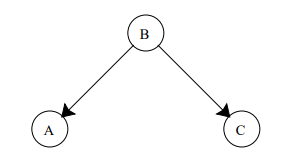

$A$ and $C$ are thus conditionally independent since there is no edge between them. Likewise, we can say that $\mathbb{P}(A|B, C) = \mathbb{P}(A|B)$, and $\mathbb{P}(C|A, B) = \mathbb{P}(C|B)$ given the previous *directed* graph.


The joint probability can also be computed as followed :


$\mathbb{P}(A, B, C) = \mathbb{P}(A|B)\cdot\mathbb{P}(B)\cdot\mathbb{P}(C|B)$

In general, given nodes $X = X_1,...,X_n$, the joint probabilty for any Bayesian network is :


$\mathbb{P}(X) = \prod\mathbb{P}(X_i|parents(X_i))$. [1]

**Two different Bayesian Networks can represent the same joint probability**. Let's illustrate this statement on the previous joint probability from the graph :


$\mathbb{P}(A|B)\cdot\mathbb{P}(B)\cdot\mathbb{P}(C|B) = \frac{\mathbb{P}(B|A)\cdot\mathbb{P}(A)}{\mathbb{P}(B)}\cdot\mathbb{P}(B)\cdot\mathbb{P}(C|B)=\mathbb{P}(A)\cdot\mathbb{P}(B|A)\cdot\mathbb{P}(C|B)$


The same joint probability can then be represented by the following Bayesian Network. Only the {$B, A$} edge has been reversed.

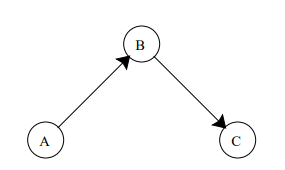

**Inference in Bayesian Networks** is the fact of computing the probability of each value of a node in a Bayesian network when other variables' values are known. An introduction to inference is given below with the 'Credit Card Fraud' example.

##2. <a id="sec2"></a>  Bayesian Network Generation

Now that the Bayesian Networks have been quickly introduced, let's discover some properties considering examples. Two different cases will be studied :


> Known structure and full observability

> Unknown structure and full observability

Our first Bayesian Networks will be generated using the *pomegranate* library downloaded using the first line command *!pip install pomegranate*. A link to the API is in the *References* [2].







### Known structure and full observablity - Credit Card Fraud

Let's build our first simple Bayesian Network to understand the *pomegranate* library on the 'Credit Card Fraud' example [1].

The Bayesian Network structure is fully known, and the conditional probabilities are also known : **everything in this Bayesian Network is already learned**.

##### Credit Card Fraud example


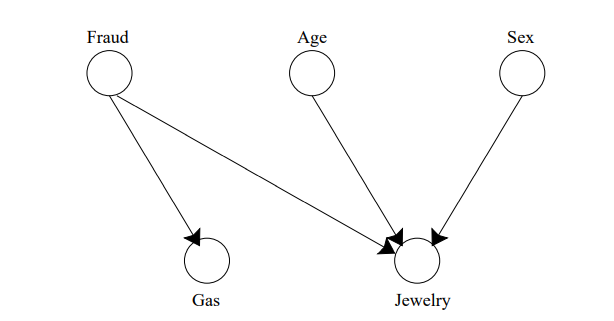

The idea of this Bayesian Network is to compute the credit card fraud probability. A credit card fraud impact jewelry and gas buyings chances. The age and sex of the purchaser are also taken into account. The conditional probability table is thus described [1]:

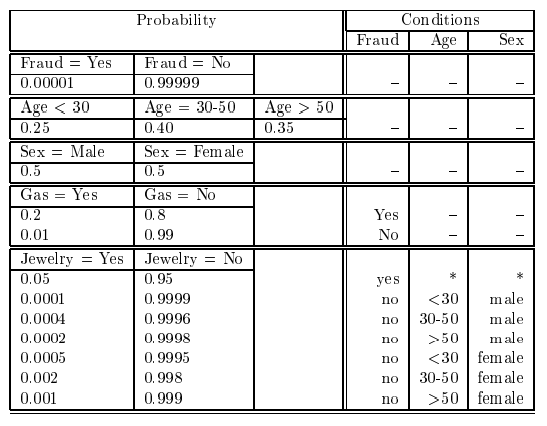

Let's note :

- $f$ : fraud variable
- $g$ : gas variable
- $s$ : sex variable
- $a$ : age variable

The posterior probability we want to compute is, by Bayes' rule :

$$\mathbb{P}(f|j, g, s, a) = \frac{\mathbb{P}(j,g,s,a,f)}{\mathbb{P}(j,g,s,a)}$$


The joint probabilities are then automatically given using the Bayesian Network previously built. Let's use the *pomegranate* library.

In [39]:
#f variable distribution 
fraud = DiscreteDistribution({'Yes':0.00001, 'No':0.99999})
#a variable distribution
age = DiscreteDistribution({'<30':0.25, '30-50':0.4, '>50':0.35})
#s variable distribution
sex = DiscreteDistribution({'Male':0.5, 'Female':0.5})
#g Conditional Probability using the previous probability table
gas = ConditionalProbabilityTable([['Yes', 'Yes', 0.2],
                                   ['No', 'Yes', 0.01], 
                                   ['Yes', 'No', 0.8], 
                                   ['No', 'No', 0.99]], [fraud])
jewelry = ConditionalProbabilityTable([['Yes', '<30', 'Male', 'Yes', 0.05],
                                       ['Yes', '<30', 'Female', 'Yes', 0.05],
                                       ['Yes', '30-50', 'Male', 'Yes', 0.05], 
                                       ['Yes', '30-50', 'Female', 'Yes', 0.05],
                                       ['Yes', '>50', 'Male', 'Yes', 0.05],
                                       ['Yes', '>50', 'Female', 'Yes', 0.05], 
                                       ['Yes', '<30', 'Male', 'No', 0.95],
                                       ['Yes', '<30', 'Female', 'No', 0.95],
                                       ['Yes', '30-50', 'Male', 'No', 0.95], 
                                       ['Yes', '30-50', 'Female', 'No', 0.95],
                                       ['Yes', '>50', 'Male', 'No', 0.95],
                                       ['Yes', '>50', 'Female', 'No', 0.95], 
                                       ['No', '<30', 'Male', 'Yes', 0.0001], 
                                       ['No', '<30', 'Male', 'No', 0.9999], 
                                       ['No', '30-50', 'Male', 'Yes', 0.0004], 
                                       ['No', '30-50', 'Male', 'No', 0.9996], 
                                       ['No', '>50', 'Male', 'Yes', 0.0002],
                                       ['No', '>50', 'Male', 'No', 0.9998],
                                       ['No', '<30', 'Female', 'Yes', 0.0005],
                                       ['No', '<30', 'Female', 'No', 0.9995],
                                       ['No', '30-50', 'Female', 'Yes', 0.002], 
                                       ['No', '30-50', 'Female', 'No', 0.998],
                                       ['No', '>50', 'Female', 'Yes', 0.001],
                                       ['No', '>50', 'Female', 'No', 0.999]], [fraud, age, sex])

#Definition of states in the graph
s_fraud = State(fraud, name = 'fraud')
s_age = State(age, name = 'age')
s_sex = State(sex, name = 'sex')
s_gas = State(gas, name = 'gas')
s_jewelry = State(jewelry, name = 'jewelry')

In [40]:
#Building the Bayesian Network
BN = BayesianNetwork('Credit card fraud problem')
BN.add_states(s_fraud, s_age, s_sex, s_gas, s_jewelry)

#Building the edges between the variables
BN.add_edge(s_fraud, s_gas)
BN.add_edge(s_fraud, s_jewelry)
BN.add_edge(s_age, s_jewelry)
BN.add_edge(s_sex, s_jewelry)

#Baking the Bayesian Network
BN.bake()

Now that the Bayesian Network is built, we'll try to compute the posterior probability and differ the values depending on the sex. The values of the variables are given in the following table.

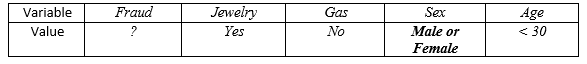

In [41]:
beliefs_male = BN.predict_proba({'jewelry' : 'Yes', 'gas' : 'No', 'sex' : 'Male', 'age' : '<30'})
beliefs_female = BN.predict_proba({'jewelry' : 'Yes', 'gas' : 'No', 'sex' : 'Female', 'age' : '<30'})

In [42]:
print('Fraud probability for a man < 30 yo given Jewelry buyings :', beliefs_male[0].items())
print('Fraud probability for a woman < 30 yo given Jewelry buyings :', beliefs_female[0].items())

Fraud probability for a man < 30 yo given Jewelry buyings : (('Yes', 0.004024184949413423), ('No', 0.9959758150505865))
Fraud probability for a woman < 30 yo given Jewelry buyings : (('Yes', 0.0008074364086373537), ('No', 0.9991925635913627))


On the same basis, try to compute the fraud probability for a woman older than 50 years old who recently bought jewelries (no gas). On collab, the next cell downloads the file *solutions1.py*.

In [4]:
!wget https://github.com/rgrand8/BayesianNetworks-SDD2020/blob/main/solutions1.py

--2021-01-07 16:23:43--  https://github.com/rgrand8/BayesianNetworks-SDD2020/blob/main/solutions1.py
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘solutions1.py.1’

solutions1.py.1         [ <=>                ]  88.01K  --.-KB/s    in 0.001s  

2021-01-07 16:23:44 (113 MB/s) - ‘solutions1.py.1’ saved [90118]



In [3]:
# %load solutions1.py

You can then play with this Bayesian Network easily to compute posterior probability you are curious about. ;)

##### Learning in Bayesian Network - Known structure and full observability


The Bayesian Network wasn't learnt earlier, as mentionned previously. Having a full sampling of the data, probability distributions are computed using statistics from data samples and Bayes' rule [1] : 

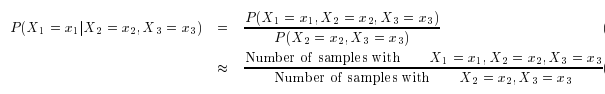

If the data is sparse, Dirichlet priors can be used to estimate the conditional probabilities [5].

### Unknown structure and full observability

From now on, let's consider unknown structure and discuss learning in Bayesian Networks with learning structure methods with data. Theoretically, two main tools are needed for generating a matching Bayesian Network :

- a metric for comparing potential structures
- a search algorithms for finding potential structures

*Metric comparison :* [1]

The joint probability $p(D, S^h)$ is used to evaluate a potential structure, where $D$ is the dataset, and $S^h$ the potential structure. Factoring and taking the log gives the following formula to compute :

$\log p(D,S^h) = \log p(D|S^h) + \log p(S^h)$


- $\log p(D|S^h)$

To compute this, the Bayesian informatic criterion (BIC) is used (see [1]) :

$\log p(D|S^h) \approx \log p(D|\theta_S, S^h)-\frac{d}{2}\log N$
where $\theta_S$ are the network parameters, $d$ is the dimension of the product of the first formula, and $N$ is the size of $D$.


- $\log p(S^h)$

The prior probability can be determined either by a person who provides possible strucures, or by defining a prior network to modify and compare with a potential other network using the metric studied above.

*Structure search methods* : [1]

Several methods can be used and are implemented in the *pomegranate* library, such as the *greedy algorithm*, the *chow-liu algorithm* and others... They are partially described in the reference paper [1]. The following graph present the time to learn a structure depending on the number of variables [6]. Therefore, we'll use the Chow-Liu algorithm (otherwise, the structure is never learnt with the other methods because of the number of pixels to learn = 64).

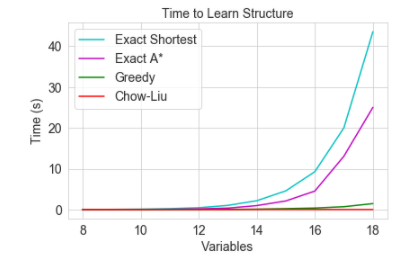

#### First approach with noise generation and digit reconstitution

Let's use the digit dataset from sklearn to **learn** and use a Bayesian Network to impute values to missing pixels. What's important to notice is the **unknown structure** we're dealing with. The Bayesian Network is built from the samples X which represents the digits pixels. The method *from_samples(samples (ndarray), algorithm (str))* is then associated to the Bayesian Network generation. We'll explain later on the difference between the algorithms proposed.

Thus, let's consider the first digit from the dataset : *0*. 

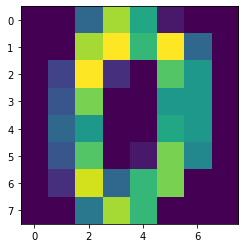

In [44]:
data = load_digits()
X, y = data.data, data.target

#X = (X > np.median(X)).astype('float64')

plt.imshow(X[0].reshape(8, 8))
plt.grid(False)
plt.show()


Now that *0* is plotted, why don't we remove randomly some pixels values and try to re-build the former *0* from the noised *0* using a Bayesian Network ?

In the next cell, the Bayesian Network is generated **from the whole logit dataset**. Then, the *noised 0* is generated and printed. You can compare both plots.

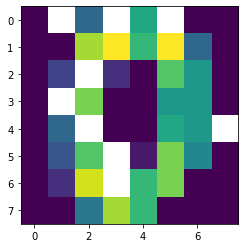

In [45]:
BN = BayesianNetwork().from_samples(X, algorithm = 'chow-liu')

X_missing = X[0].copy()

# parameter 'size' defines the number of pixels to be removed
missing_pixels = np.random.randint(0, high = 64, size = 10)
X_missing[missing_pixels] = np.nan

plt.imshow(X_missing.reshape(8, 8))
plt.grid(False)
plt.show()


Using the generated Bayesian Network, the new digit is *predicted* considering the observable pixels and the conditional probabilities in the Bayesian Network.

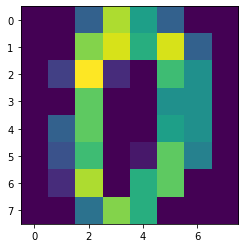

In [46]:
X_missing = X_missing.reshape(1, 64)

X_pred = BN.predict(X_missing)
X_pred = numpy.array(X_pred)
X_pred = X_pred.astype('float')

plt.imshow(X_pred[0].reshape(8,8))
plt.grid(False)
plt.show()

Scroll up to compare the new *0* with the original one.

#### Pixels imputation

We'll extend what has been seen on a single digit to the whole digit dataset and compare the score of predictions. A gaussian distribution is chosen to pick the number of pixels to be removed for each digit sample. Let's assume $\mu = 10$ % and $\sigma = 2$ % of total pixels for the Gaussian Distribution.

In [47]:
X, y = data.data, data.target

mu = 0.1*X.shape[1]
sigma = 0.02*X.shape[1]

print('mu :', mu)
print('sigma :', sigma)

t0 = time.time()
BN_chow_liu = BayesianNetwork().from_samples(X, algorithm = 'chow-liu')
t1 = time.time() - t0
print('time (s) to generate BN with chow-liu algorithm :', t1)


#Reducing missing samples number for prediction execution time
X_missing = X[:100].copy()
missing_pixels = [np.random.choice(64, size = int(np.random.normal(mu, sigma)), replace = False) for i in range(X_missing.shape[0])]
for i in range(X_missing.shape[0]):
  X_missing[i][missing_pixels[i]] = np.nan


mu : 6.4
sigma : 1.28
time (s) to generate BN with chow-liu algorithm : 0.7261307239532471


In [48]:
t0 = time.time()
X_pred_chow_liu = BN_chow_liu.predict(X_missing)
t1 = time.time() - t0
print('time (s) to predict chow_liu:', t1)

diff = np.abs(X_pred_chow_liu-X[:100])
mean = np.mean(diff, axis = 1)
error_color = np.mean(mean)
print('error_color chow-liu :', error_color)

time (s) to predict chow_liu: 7.922026634216309
error_color chow-liu : 0.16546875


*error_color* computes the mean difference between the pixels of the origin dataset $X$ and the predicted dataset $Xpred$. If the error_color equals to zero, all the pixels are perfectly predicted and match the origin dataset. This indicator takes into account the pixel color error, and the degree of the error (ex : pixel 1 differs from 1 or 2 shades of colors between $X$ and $Xpred$ etc.).

Let's now consider the percentage of unaccurate pixels.

In [49]:
value_non_zero = np.count_nonzero(diff, axis = 1)/64
mean = value_non_zero.mean()
print('Mean pixel error per sample (%) :', mean*100)

Mean pixel error per sample (%) : 3.484375


From $\mu = 10$ % $ = 6.4$ missing pixels, the Bayesian Network managed to estimate perfectly more pixels (only 3,5 % of unaccurate pixels).

Let's generalize what we'been observing for $\mu = 10$% to a finite set of noise proportion $\mu_{tot} = [5\%, 10\%, 20\%, 30\%, 50\%, 70\%]$ and try to see if our generated Bayesian Network still manages to estimate missing pixels. Notice that the same Bayesian Network will be used for all the predictions in $\mu_{tot}$.

Mean number of missing pixels :  3.2
Mean number of missing pixels :  6.4
Mean number of missing pixels :  12.8
Mean number of missing pixels :  19.2
Mean number of missing pixels :  32.0
Mean number of missing pixels :  44.8


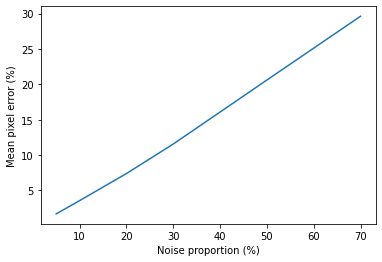

In [50]:
noise_proportion = np.array([0.05, 0.1, 0.2, 0.3, 0.5, 0.7])
mean_pixel_error = []

mu_set = X.shape[1]*noise_proportion
sigma = 0.02*X.shape[1]

BN_chow_liu = BayesianNetwork().from_samples(X, algorithm = 'chow-liu')

for mu in mu_set:
  X_missing = X[:100].copy()
  print('Mean number of missing pixels : ', mu)
  missing_pixels = [np.random.choice(64, size = int(np.random.normal(mu, sigma)), replace = False) for i in range(X_missing.shape[0])]
  for i in range(X_missing.shape[0]):
    X_missing[i][missing_pixels[i]] = np.nan

  X_pred_chow_liu = BN_chow_liu.predict(X_missing)
  diff = np.abs(X_pred_chow_liu-X[:100])
  value_non_zero = np.count_nonzero(diff, axis = 1)/64
  mean = value_non_zero.mean()
  mean_pixel_error.append(mean*100)

plt.figure()
plt.plot(noise_proportion*100, mean_pixel_error)
plt.xlabel('Noise proportion (%)')
plt.ylabel('Mean pixel error (%)')
plt.show()

The number of unaccurate pixels reduces linearly with the noise proportion. Bayesian Network allows to impute values to missing pixels.

## Dynamic Bayesian Network (DBN)

No relation to time was made for the previous examples in the notebook. Dynamic Bayesian Networks are a big domain of interest though, especially for speech recognition application. Let's explain quickly how represent time in DBN, and use it on speech recognition.

### DBN's theory

Two things need to be defined to talk about *dynamic* Bayesian Network [1]:

- a prior network
- a transition network

The *prior network* gives the state of the all variables with their probabilities at $t = 0$. The *transition network* gives the condition probabilities between different time step. The following graphs, from the scientific paper [1], illustrate those concepts.

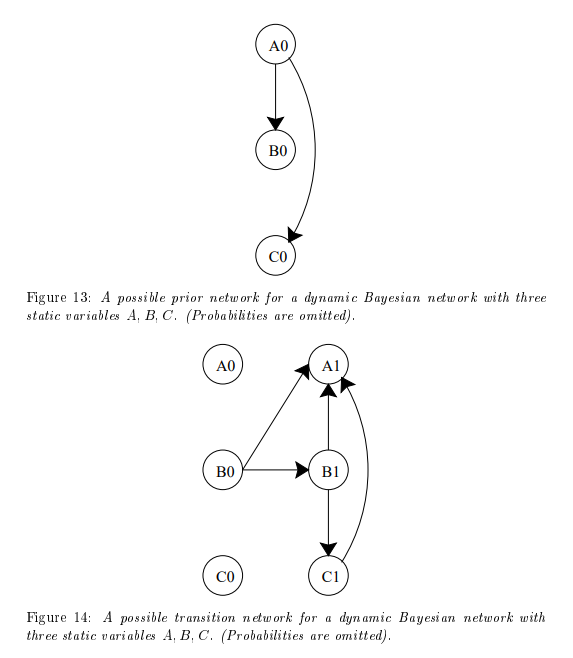

As mentionned above, DBNs are very appropriate for Automatic Speech Recognition (ASR). The main reasons are based on the easy joint probability factorization due to Bayesian Networks, the multiple learning algorithms to explore solutions on the **same** built Bayesian Network. 


DBN are part of the Hidden Markov Model family (HMM) widely used for ASR. The following DBN is taken from the referent paper [1] and illustrates the recognition of the sound DIGIT, decomposed in phonemes : D - IH - JH - IH - T.

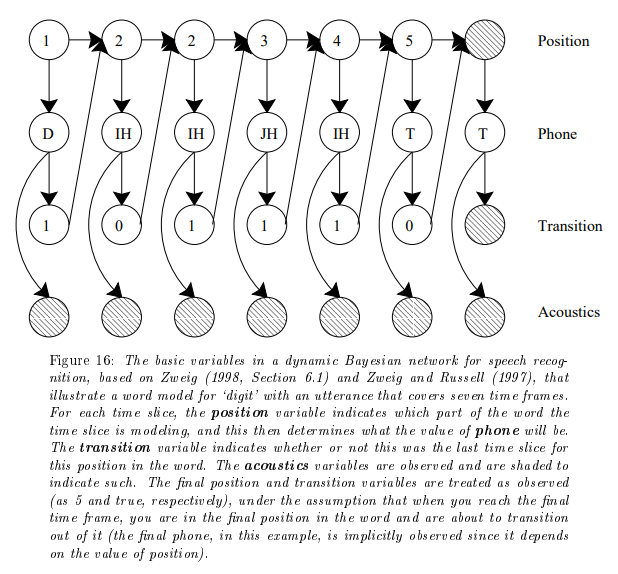

### Speech Recognition using DBN

Let's play with the *SpeechRecognition* library [3] to transcribe the speech from Didier Deschamps after the 2018 World Cup Final : https://www.youtube.com/watch?v=51kniZi1eh0

It seems that the *!wget* command to download the audio modifies the .aiff file needed for the library to transcribe. To execute the Speech Recognition, please download the file 'Deschamps_finale_2018.aiff' locally on your laptop from my GitHub (https://github.com/rgrand8/BayesianNetworks-SDD2020) and import the file on the Collab Notebook.

The next cells install the *SpeechRecognition* library and *pyaudio* library to use your own microphone as input.

In [ ]:
!pip install SpeechRecognition
!sudo apt-get install python-pyaudio python3-pyaudio
!pip install pyaudio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 32.8 MB 15 kB/s  eta 0:00:01�███████████▋       | 25.3 MB 3.5 MB/s eta 0:00:03
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
[sudo] password for rgrand: 

In [51]:
import speech_recognition as sr 
sr.__version__

'3.8.1'

In [52]:
r = sr.Recognizer()

deschamps = sr.AudioFile('Deschamps_finale_2018.aiff')
with deschamps as source:
  audio = r.record(source)

r.recognize_google(audio, language = 'fr-FR', show_all=True)

{'alternative': [{'confidence': 0.92718309,
   'transcript': "donne-moi dans les années à venir vous emprunterez sans doute des routes différentes mais vous serez lis avis par rapport à cette coupe la les mecs et la deuxième chose qui concerne vous les joueurs et tout le staff c'est qu'à partir de ce soir vous n'êtes plus les mêmes les mecs"},
  {'transcript': "donne-moi dans les années à venir vous emprunterez sans doute des routes différentes mais vous serez lis avis par rapport à cette coupe la les mecs et la deuxième chose qui concerne vous les joueurs et tout le staff c'est qu'à partir de ce soir vous n'êtes plus les mêmes les mecs vous avez"},
  {'transcript': "donne-moi dans les années à venir vous emprunterez sans doute des routes différentes mais vous serez lit avis par rapport à cette coupe la les mecs et la deuxième chose qui concerne vous les joueurs et tout le staff c'est qu'à partir de ce soir vous n'êtes plus les mêmes les mecs"},
  {'transcript': "moi dans les années à 

If an error occurs, don't hesitate to restart the kernel and re-install the *Speech recognition* library. 

You can see several transcripts corresponding to the audio file.

It's even possible to record your own microphone and transcript what you've been saying during the record, using the following cell.

In [ ]:
# Record Audio
r = sr.Recognizer()
with sr.Microphone() as source:
    print("Say something!")
    audio = r.listen(source)

# Speech recognition using Google Speech Recognition
try:
    # for testing purposes, we're just using the default API key
    # to use another API key, use `r.recognize_google(audio, key="GOOGLE_SPEECH_RECOGNITION_API_KEY")`
    # instead of `r.recognize_google(audio)`
    print("You said: " + r.recognize_google(audio))
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))

OSError: ignored